<a href="https://colab.research.google.com/github/shirish-baral/python-code-diary/blob/main/placement-prediction-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd

In [38]:
df = pd.read_csv('placement.csv')

In [39]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [40]:
# Remove unneccesary columns - Preprocess
df = df.iloc[:, 1:]

In [41]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

Steps
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

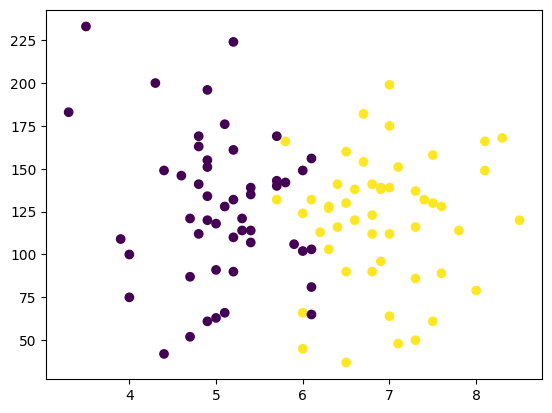

In [43]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


 Create a ML Model which will classify this data  
Help me understand about data basically.

In this case, Logistic Regression

In [44]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1] #last column
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [46]:
X_train

,cgpa,iq
99,6.2,113.0
92,5.2,110.0
21,7.1,151.0
48,6.6,138.0
84,5.7,169.0
...,...,...
28,5.2,90.0
60,6.9,139.0
69,8.5,120.0
30,7.6,128.0


In [47]:
y_train

,placement
99,1
92,0
21,1
48,1
84,0
...,...
28,0
60,1
69,1
30,1


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
X_train = scaler.fit_transform(X_train)

In [52]:
X_train

array([[ 1.79224165e-01, -2.83913438e-01],
       [-7.07049180e-01, -3.58193116e-01],
       [ 9.76870176e-01,  6.56962489e-01],
       [ 5.33733503e-01,  3.35083883e-01],
       [-2.63912507e-01,  1.10264056e+00],
       [-5.29794511e-01,  3.59843776e-01],
       [-1.85920453e+00, -3.82953009e-01],
       [ 8.88242842e-01, -1.49714819e+00],
       [-7.95676514e-01,  1.27595981e+00],
       [-2.21371387e+00,  2.68727370e+00],
       [-1.06155852e+00,  1.10264056e+00],
       [ 6.22360838e-01,  1.42451917e+00],
       [ 1.59726152e+00, -2.59153545e-01],
       [ 1.96949632e-03, -1.96758615e+00],
       [-8.84303849e-01, -1.60113974e-01],
       [ 1.86314352e+00,  6.07442704e-01],
       [-1.06155852e+00,  4.09363561e-01],
       [ 4.45106169e-01, -8.53390972e-01],
       [ 2.04039819e+00,  1.07788067e+00],
       [ 9.05968308e-02, -1.47238829e+00],
       [ 4.45106169e-01, -2.16566529e+00],
       [ 7.10988173e-01, -3.08673330e-01],
       [-7.95676514e-01, -1.44762840e+00],
       [ 4.

In [54]:
X_test = scaler.transform(X_test)
X_test

array([[-1.06155852, -0.30867333],
       [-1.77057719, -0.60579204],
       [-0.97293118,  0.23604431],
       [ 0.5337335 , -0.11059419],
       [ 1.86314352,  1.02836088],
       [-1.15018585, -0.92767065],
       [ 0.97687018, -1.89330647],
       [ 0.62236084,  0.73124217],
       [ 0.2678515 , -0.53151237],
       [ 0.09059683,  0.18652453]])

Training the Model using Logistic Regression Classifier

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
clf = LogisticRegression()

In [59]:
# Model training
clf.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_pred = clf.predict(X_test)

In [63]:
y_test

,placement
59,0
18,0
40,0
20,1
65,1
23,0
5,1
74,1
98,1
71,1


In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,y_pred)

1.0

In [67]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

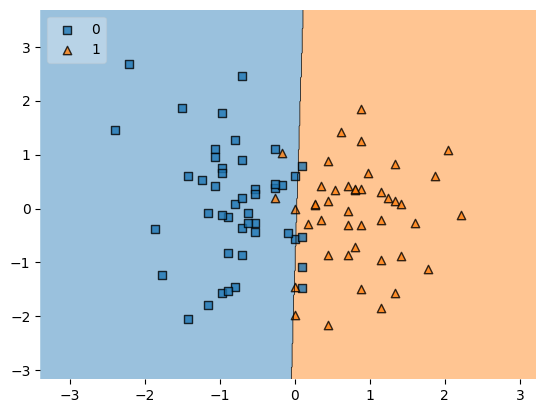

In [70]:
plot_decision_regions(X_train,y_train.values,clf=clf, legend=2)

In [72]:
import pickle #Convert object to file

In [73]:
pickle.dump(clf,open('model.pkl','wb'))